Missing values in each column
Year                                   0
Town Code                              0
Town                                   0
Census Units                           0
Government Assisted                    1
Tenant Rental Assistance               0
 Single Family CHFA/ USDA Mortgages    0
Deed Restricted Units                  0
Total Assisted Units                   0
Percent Affordable                     0
dtype: int64
Duplicate rows: 0



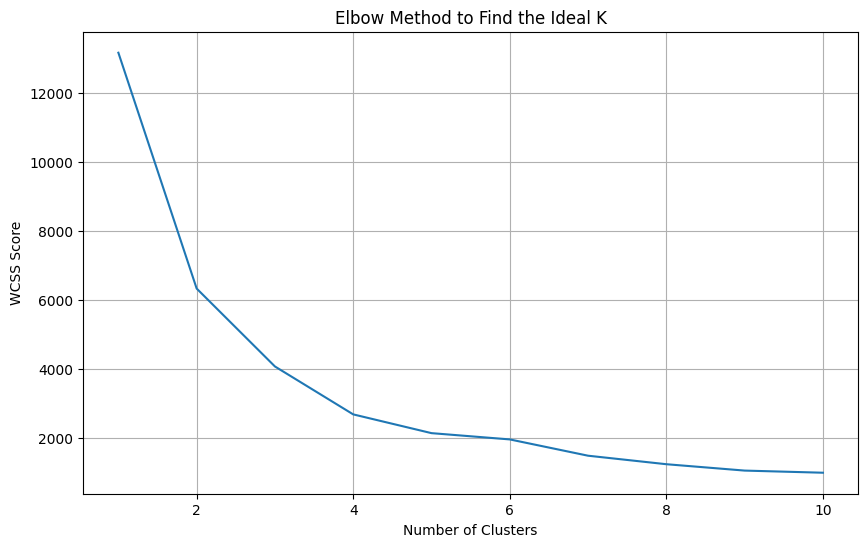


Average factor values for each cluster: 

         Government Assisted  Tenant Rental Assistance  \
Cluster                                                  
1                1842.052381                791.319048   
2                7715.903846               5537.115385   
3                 160.840420                 46.557188   
4                3398.692308               1556.307692   

         Single Family CHFA/ USDA Mortgages  Deed Restricted Units  \
Cluster                                                              
1                                631.704762              45.014286   
2                               1338.192308             172.576923   
3                                 78.762329              14.956978   
4                                342.307692             958.346154   

         Total Assisted Units  Percent Affordable  
Cluster                                            
1                 3310.090476           16.849048  
2                14763.788462  

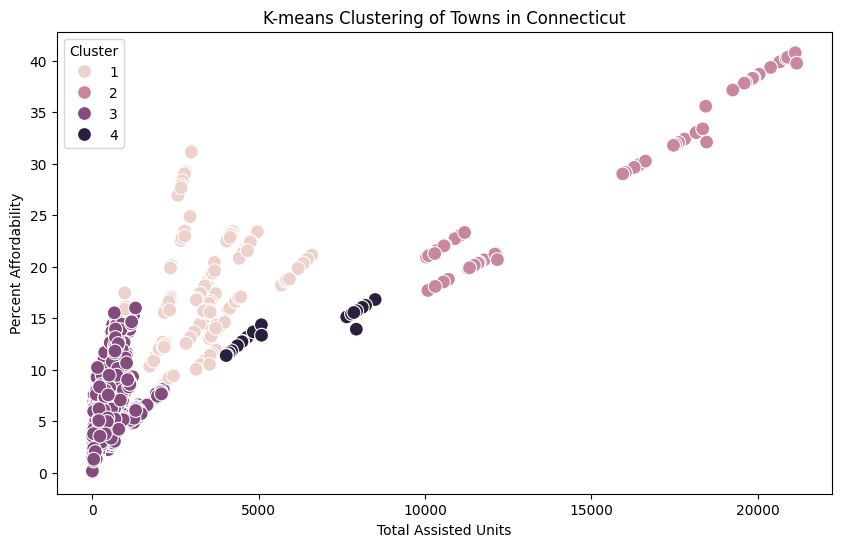


Final Inference Report on the Cluster Analysis:

Overall percent affordability of Cluster 1: 16.85%
Overall percent affordability of Cluster 2: 27.86%
Overall percent affordability of Cluster 3: 4.32%
Overall percent affordability of Cluster 4: 14.17%
Analysis: Towns in Cluster 3 have the lowest percentage of housing affordability. Affordable housing programs and initiatives should ideally target the towns in this cluster for better impact.

Overall amount of government assisted units in Cluster 1: 1842.05
Overall amount of government assisted units in Cluster 2: 7715.9
Overall amount of government assisted units in Cluster 3: 160.84
Overall amount of government assisted units in Cluster 4: 3398.69
Analysis: Towns in Cluster 3 receive the least government assistance. Governmental assistance programs should target the towns in these clusters for better impact.

Evaluation Metrics:
Final WCSS score: 2685.6598434465564
Silhouette Score: 0.712700979186554


In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Stores the dataset in a pandas DataFrame
data = pd.read_csv('/content/Affordable_Housing_by_Town_2011-2023.csv')


# DATA CLEANING

# Converts missing data labels to NaN for easier cleaning
data = data.replace(['NO DATA', 'N/A', ''], np.nan)

# Stores the total # (sum) of missing values for each column in a series (one-dimensional array)
numMissing = data.isnull().sum();
# isnull() represents missing values (NaN) as True (value of 1) or False otherwise (value of 0)

#Prints the series of sums to the output
print("Missing values in each column")
print (str(numMissing))


# Counts the total # of duplicates (excluding first occurrence)
duplicateSum = data.duplicated().sum()
# .duplicated() indicates duplicates as True (value of 1) or False otherwise (value of 0)

# Prints the sum (# of duplicate rows) to the ouput
print("Duplicate rows: " + str(duplicateSum))
print()

# Removes duplicate rows from the DataFrame while keeping the first occurrence of each duplicate
data = data.drop_duplicates()


# Standardizes column names (ex. removes leading/trailing spaces, correcting typos)
data.columns = data.columns.str.strip()

# KMEANS CLUSTERING

# Isolates relevant factors for clustering
factors = data[['Government Assisted', 'Tenant Rental Assistance',
                 'Single Family CHFA/ USDA Mortgages',
                 'Deed Restricted Units', 'Total Assisted Units',
                 'Percent Affordable']]

# Replaces missing values (i.e. NaN) with 0 to prevent errors in handling NaN during calculations
factors = factors.fillna(0)

# Scales data to ensure that each feature contributes equally to distance calculations
scaler = StandardScaler()
# Calculates the means and stdev for each feature to respectively standardize them (mean = 0, stdev = 1)
scaledFactors = scaler.fit_transform(factors)

# Determines the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    # creates the KMeans object - takes in the number of clusters and random seed of 42 to randomly initialize cluster centroids
    kmeans = KMeans(n_clusters=i, random_state= 42)
    # fits the KMeans object to our dataset- initializes random centroids, assigns data points to nearest centroids, recalculates centroids until convergence is met
    kmeans.fit(scaledFactors)
    # appends the final wcss (or inertia) value for each respective # of clusters
    wcss.append(kmeans.inertia_)

# Plots the Elbow Method - # of clusters v. WCSS scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Find the Ideal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

# Sets optimal number of clusters based on Elbow Method (elbow approximately on graph at k = 4)
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
# Fits the Kmeans object to our dataset and stores the assigned cluster # for each data point in the DataFrame
data['Cluster'] = kmeans.fit_predict(scaledFactors)


# Renames clusters starting from 1 instead of 0 for readability
data['Cluster'] = data['Cluster'] + 1


# Groups data points by clusters and calculates average value of each factor by cluster
clusterAnalysis = data.groupby('Cluster')[['Government Assisted', 'Tenant Rental Assistance',
                                             'Single Family CHFA/ USDA Mortgages',
                                             'Deed Restricted Units',
                                             'Total Assisted Units', 'Percent Affordable']].mean()

print()
print("Average factor values for each cluster: ")
print()
print(clusterAnalysis)
print()

# Plots the clusters - total assisted units v. percent affordability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Assisted Units', y='Percent Affordable', hue='Cluster', s=100)
plt.title('K-means Clustering of Towns in Connecticut')
plt.xlabel('Total Assisted Units')
plt.ylabel('Percent Affordability')
plt.legend(title='Cluster')
plt.show()
print()

#INFERENCE REPORT - drawing understandings from the 4 clusters

print("Final Inference Report on the Cluster Analysis:")
print()

# Reports the cluster with the lowest affordability
unaffordableCluster = 1
for i in range(1, k+1):
  print("Overall percent affordability of Cluster " + str(i) + ": " + str(round(clusterAnalysis.loc[i,'Percent Affordable'], 2)) + "%")
  if clusterAnalysis.loc[i,'Percent Affordable'] < clusterAnalysis.loc[unaffordableCluster,'Percent Affordable']:
    unaffordableCluster = i;


print("Analysis: Towns in Cluster " + str(unaffordableCluster) + " have the lowest percentage of housing affordability. Affordable housing programs and initiatives should ideally target the towns in this cluster for better impact.")
print()

#Reports the cluster with the lowest government assistance
lowGovAssistance = 1
for i in range(1, k+1):
  print("Overall amount of government assisted units in Cluster " + str(i) + ": " + str(round(clusterAnalysis.loc[i,'Government Assisted'], 2)))
  if clusterAnalysis.loc[i,'Government Assisted'] < clusterAnalysis.loc[lowGovAssistance,'Government Assisted']:
    lowGovAssistance = i;

print("Analysis: Towns in Cluster " + str(lowGovAssistance) + " receive the least government assistance. Governmental assistance programs should target the towns in these clusters for better impact.")
print()

#EVALUATION METRICS

print("Evaluation Metrics:")

# Displays the final wcss score
finalWcss = kmeans.inertia_
print("Final WCSS score: " + str(finalWcss))

# Displays the silhouette score
silhouetteScore = silhouette_score(scaledFactors, kmeans.labels_)
print('Silhouette Score: ' + str(silhouetteScore))


